In [1]:
from nsetools import Nse
from nsepy import get_history
nse=Nse()
from datetime import date
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
all_stock_codes = nse.get_stock_codes()    ### Taking all sock codes from NSE
stock_codes=list(all_stock_codes.keys())

In [4]:
notprocessed=[]   ### Stocks that Cant be processed

In [5]:
stock_codes=['HINDZINC','TATAMOTORS']   ###Put your NSE codes here if you want analyse specific else you can comment it
## Which will do it for 1400 stocks
ph_name=stock_codes[0]

In [6]:
stocks={}

In [7]:
from statistics import mean
from statistics import stdev
for sym in stock_codes:
    df = get_history(symbol=sym,
                        start=date(2021,4,21), ###Define Start and End dates 
                        end=date(2021,9,27))
    try:
        obj={'Name':df['Symbol'][0],'gain':[(100/df['Close'][i-1])*(df['Close'][i]-df['Close'][i-1]) for i in range(1,len(df['Close']))],'delivery':[i for i in df['%Deliverble']],'close':[df['Close'][i] for i in range(1,len(df['Close']))]}
        obj['mean']=mean(obj['gain'])
        obj['std']=stdev(obj['gain'])
        stocks[obj['Name']]=obj
    except:
        #print(sym)
        pass

In [8]:
table=pd.DataFrame()
names=[]
mean=[]
std=[]
for i in list(stocks.keys()):
    names.append(i)
    mean.append(stocks[i]['mean'])
    std.append(stocks[i]['std'])
table['name']=names
table['mean']=mean
table['std']=std

In [9]:
ob1=table.sort_values(by=['std'])

In [10]:
ob1

,name,mean,std
0,HINDZINC,0.074517,1.843817
1,TATAMOTORS,0.129970,2.002644


In [11]:
tb=ob1.set_index('name')

In [12]:
tb

,mean,std
name,,
HINDZINC,0.074517,1.843817
TATAMOTORS,0.129970,2.002644


In [13]:
tb[tb['mean']>0].to_csv('STD.csv')

In [14]:
#stocks['INFY']['delivery']

In [15]:
list(stock_codes)

['HINDZINC', 'TATAMOTORS']

<h1> Analysis of individual Stocks <h1>

In [16]:
stocks[ph_name].keys()

dict_keys(['Name', 'gain', 'delivery', 'close', 'mean', 'std'])

In [17]:
factor1='delivery'
factor2='gain'
factor3='close'

In [18]:
name='TATAMOTORS'   ###INPUT YOUR STOCK NAME HERE

In [19]:
g1=stocks[name][factor1][1:]
g2=stocks[name][factor2]
g3=stocks[name][factor3]

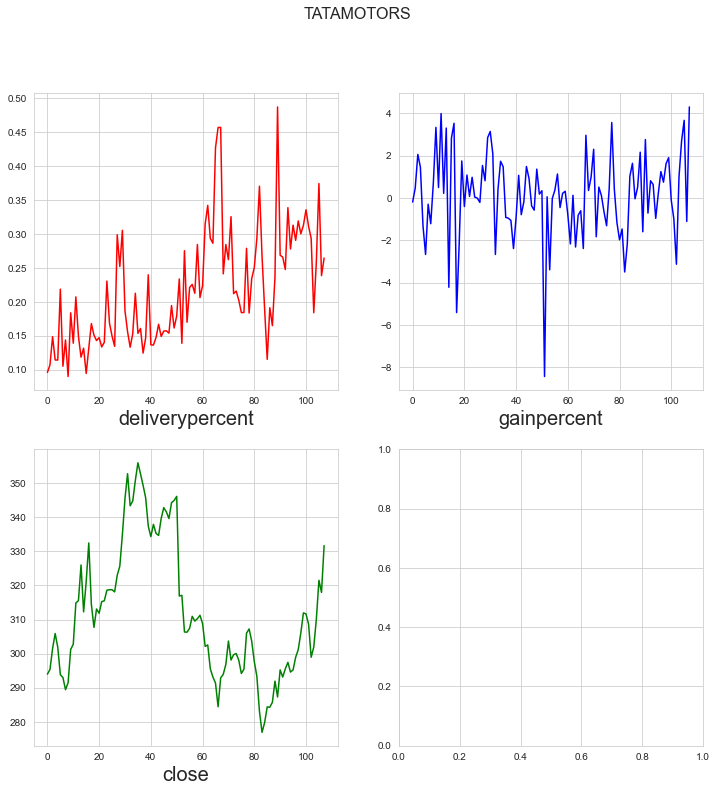

In [34]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.lineplot(ax=ax[0][0],y=g1,x=np.arange(len(g1)),color='red').set_xlabel(factor1+'percent', fontsize = 20)
sns.lineplot(ax=ax[0][1],y=g2,x=np.arange(len(g2)),color='blue').set_xlabel(factor2+'percent', fontsize = 20)
sns.lineplot(ax=ax[1][0],y=g3,x=np.arange(len(g3)),color='green').set_xlabel(factor3, fontsize = 20)
fig.suptitle(name,fontsize=16)
sns.set_style("whitegrid")
plt.show()

In [21]:
from statistics import mean
from statistics import stdev
s1=pd.Series(stocks[name]['gain'])
p=s1[s1>0]
n=s1[s1<0]
if(len(n)==0):
    n=[0]
if(len(p)==0):
    p=[0]
avg=mean(s1)
pos_mean=mean(p)
pos_max=max(p)
neg_mean=mean(n)
neg_min=min(n)
gain_days_prob=len(p)/len(s1)
loss_days_prob=len(n)/len(s1)

In [22]:
tb=pd.DataFrame(index=[name])
tb['max_pos']=pos_max
tb['mean_pos']=pos_mean
tb['min_neg']=neg_min
tb['mean_neg']=neg_mean
tb['mean']=avg
tb['gain_days_prob']=gain_days_prob
tb['loss_days_prob']=loss_days_prob

In [25]:
tb

,max_pos,mean_pos,min_neg,mean_neg,mean,gain_days_prob,loss_days_prob
TATAMOTORS,4.308854,1.423948,-8.436868,-1.583133,0.12997,0.564815,0.425926


In [27]:
list(tb.columns)

['max_pos',
 'mean_pos',
 'min_neg',
 'mean_neg',
 'mean',
 'gain_days_prob',
 'loss_days_prob']